In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [99]:
data = pd.read_csv("../data/2025_LoL_esports_match_data_from_OraclesElixir.csv")

C:\Users\yandrade\AppData\Local\Temp\ipykernel_10064\1634243045.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../data/2025_LoL_esports_match_data_from_OraclesElixir.csv")


In [100]:
data["league"].unique()

array(['LFL2', 'LPL', 'LCKC', 'LVP SL', 'LCK', 'NLC', 'LCP', 'LEC', 'HLL',
       'PRM', 'LFL', 'LIT', 'TCL', 'HW', 'LJL', 'LTA S', 'LTA N', 'RL',
       'NEXO', 'EBL', 'PCS', 'ROL', 'LPLOL', 'AL', 'LTA'], dtype=object)

In [101]:
lta = data[data["league"] == "LTA"]

In [102]:
colunas_desempenho_por_tempo = ['region','position', 'goldat10', 'xpat10', 'csat10', 'golddiffat10', 'xpdiffat10', 'csdiffat10', 'killsat10', 'assistsat10', 'deathsat10', 'goldat15', 'xpat15', 'csat15','golddiffat15', 'xpdiffat15', 'csdiffat15', 'killsat15',  'assistsat15',  'deathsat15','goldat20', 'xpat20', 'csat20', 'golddiffat20','xpdiffat20', 'csdiffat20', 'killsat20', 'assistsat20', 'deathsat20','goldat25', 'xpat25', 'csat25','golddiffat25', 'xpdiffat25', 'csdiffat25', 'killsat25', 'assistsat25', 'deathsat25']

In [103]:
lta_s_teams = list(data[data["league"] == "LTA S"]["teamname"].unique())
lta_n_teams = list(data[data["league"] == "LTA N"]["teamname"].unique())

In [104]:
def region(team):
    if team in lta_n_teams:
        return "LTA_N"
    elif team in lta_s_teams:
        return "LTA_S"

In [105]:
lta.loc[:,"region"] = lta["teamname"].apply(region)

C:\Users\yandrade\AppData\Local\Temp\ipykernel_10064\2498242305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lta.loc[:,"region"] = lta["teamname"].apply(region)


In [106]:
lta_data = lta[colunas_desempenho_por_tempo]

In [107]:
lta_data.columns

Index(['region', 'position', 'goldat10', 'xpat10', 'csat10', 'golddiffat10',
       'xpdiffat10', 'csdiffat10', 'killsat10', 'assistsat10', 'deathsat10',
       'goldat15', 'xpat15', 'csat15', 'golddiffat15', 'xpdiffat15',
       'csdiffat15', 'killsat15', 'assistsat15', 'deathsat15', 'goldat20',
       'xpat20', 'csat20', 'golddiffat20', 'xpdiffat20', 'csdiffat20',
       'killsat20', 'assistsat20', 'deathsat20', 'goldat25', 'xpat25',
       'csat25', 'golddiffat25', 'xpdiffat25', 'csdiffat25', 'killsat25',
       'assistsat25', 'deathsat25'],
      dtype='object')

In [108]:
# Pequena visualização de agrupamento antes de realizar a atribuição
lta_data.groupby(["region", "position"]).mean().round(2)

goldat10    xpat10  csat10  golddiffat10  xpdiffat10  \
region position                                                         
LTA_N  bot        3737.44   3620.11   86.78        332.22      187.67   
       jng        3478.33   3788.44   74.00        269.89      303.33   
       mid        3527.44   4731.44   89.44        125.78       51.78   
       sup        2539.00   2371.33   15.33        263.11       90.67   
       team      16466.78  19157.44  339.44       1116.56     1066.78   
       top        3184.56   4646.11   73.89        125.56      433.33   
LTA_S  bot        3405.22   3432.44   83.22       -332.22     -187.67   
       jng        3208.44   3485.11   64.78       -269.89     -303.33   
       mid        3401.67   4679.67   88.67       -125.78      -51.78   
       sup        2275.89   2280.67   15.44       -263.11      -90.67   
       team      15350.22  18090.67  321.11      -1116.56    -1066.78   
       top        3059.00   4212.78   69.00       -125.56     -433.33   

                 csdiffat10  killsat10  assistsat10  deathsat10  goldat15  \
region position                                                             
LTA_N  bot             3.56        0.0          0.0         0.0   5946.22   
       jng             9.22        0.0          0.0         0.0   5297.44   
       mid             0.78        0.0          0.0         0.0   5443.00   
       sup            -0.11        0.0          0.0         0.0   3927.22   
       team           18.33        0.0          0.0         0.0  25862.22   
       top             4.89        0.0          0.0         0.0   5248.33   
LTA_S  bot            -3.56        0.0          0.0         0.0   5436.89   
       jng            -9.22        0.0          0.0         0.0   4916.22   
       mid            -0.78        0.0          0.0         0.0   5305.56   
       sup             0.11        0.0          0.0         0.0   3557.44   
       team          -18.33        0.0          0.0         0.0  24110.44   
       top            -4.89        0.0          0.0         0.0   4894.33   

                 ...  deathsat20  goldat25    xpat25  csat25  golddiffat25  \
region position  ...                                                         
LTA_N  bot       ...         0.0  10486.00  11660.78  246.78        746.00   
       jng       ...         0.0   8695.33  11115.11  183.78        637.67   
       mid       ...         0.0   9918.56  12836.44  230.11        659.78   
       sup       ...         0.0   6340.22   5847.56   31.44        489.78   
       team      ...         0.0  44385.22  54141.44  893.00       2685.78   
       top       ...         0.0   8945.11  12681.56  200.89        152.56   
LTA_S  bot       ...         0.0   9740.00  11189.00  242.00       -746.00   
       jng       ...         0.0   8057.67   9922.22  156.00       -637.67   
       mid       ...         0.0   9258.78  12378.00  221.00       -659.78   
       sup       ...         0.0   5850.44   6207.22   31.67       -489.78   
       team      ...         0.0  41699.44  51922.22  853.78      -2685.78   
       top       ...         0.0   8792.56  12225.78  203.11       -152.56   

                 xpdiffat25  csdiffat25  killsat25  assistsat25  deathsat25  
region position                                                              
LTA_N  bot           471.78        4.78        0.0          0.0         0.0  
       jng          1192.89       27.78        0.0          0.0         0.0  
       mid           458.44        9.11        0.0          0.0         0.0  
       sup          -359.67       -0.22        0.0          0.0         0.0  
       team         2219.22       39.22        0.0          0.0         0.0  
       top           455.78       -2.22        0.0          0.0         0.0  
LTA_S  bot          -471.78       -4.78        0.0          0.0         0.0  
       jng         -1192.89      -27.78        0.0          0.0         0.0  
       mid          -458.44       -9.11   

In [109]:
# Removendo "team" das colunas de posição.

lta_data = lta_data[lta_data["position"] != "team"]

In [110]:
lta_data = lta_data.groupby(["region", "position"]).mean().round(2).reset_index()

In [117]:
turretplates = lta[lta['position'] == "team"][["teamname","turretplates"]].groupby(["teamname"]).sum().sort_values(by="turretplates", ascending=False).reset_index()

In [118]:
lta_data

,region,position,goldat10,xpat10,csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,...,deathsat20,goldat25,xpat25,csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25
0,LTA_N,bot,3737.44,3620.11,86.78,332.22,187.67,3.56,0.0,0.0,...,0.0,10486.00,11660.78,246.78,746.00,471.78,4.78,0.0,0.0,0.0
1,LTA_N,jng,3478.33,3788.44,74.00,269.89,303.33,9.22,0.0,0.0,...,0.0,8695.33,11115.11,183.78,637.67,1192.89,27.78,0.0,0.0,0.0
2,LTA_N,mid,3527.44,4731.44,89.44,125.78,51.78,0.78,0.0,0.0,...,0.0,9918.56,12836.44,230.11,659.78,458.44,9.11,0.0,0.0,0.0
3,LTA_N,sup,2539.00,2371.33,15.33,263.11,90.67,-0.11,0.0,0.0,...,0.0,6340.22,5847.56,31.44,489.78,-359.67,-0.22,0.0,0.0,0.0
4,LTA_N,top,3184.56,4646.11,73.89,125.56,433.33,4.89,0.0,0.0,...,0.0,8945.11,12681.56,200.89,152.56,455.78,-2.22,0.0,0.0,0.0
5,LTA_S,bot,3405.22,3432.44,83.22,-332.22,-187.67,-3.56,0.0,0.0,...,0.0,9740.00,11189.00,242.00,-746.00,-471.78,-4.78,0.0,0.0,0.0
6,LTA_S,jng,3208.44,3485.11,64.78,-269.89,-303.33,-9.22,0.0,0.0,...,0.0,8057.67,9922.22,156.00,-637.67,-1192.89,-27.78,0.0,0.0,0.0
7,LTA_S,mid,3401.67,4679.67,88.67,-125.78,-51.78,-0.78,0.0,0.0,...,0.0,9258.78,12378.00,221.00,-659.78,-458.44,-9.11,0.0,0.0,0.0
8,LTA_S,sup,2275.89,2280.67,15.44,-263.11,-90.67,0.11,0.0,0.0,...,0.0,5850.44,6207.22,31.67,-489.78,359.67,0.22,0.0,0.0,0.0
9,LTA_S,top,3059.00,4212.78,69.00,-125.56,-433.33,-4.89,0.0,0.0,...,0.0,8792.56,12225.78,203.11,-152.56,-455.78,2.22,0.0,0.0,0.0


In [119]:
turretplates

,teamname,turretplates
0,Team Liquid,27.0
1,Cloud9,15.0
2,Isurus Estral,15.0
3,FlyQuest,11.0
4,100 Thieves,9.0
5,LOUD,7.0
6,paiN Gaming,6.0
7,Leviatan,4.0


([], [])

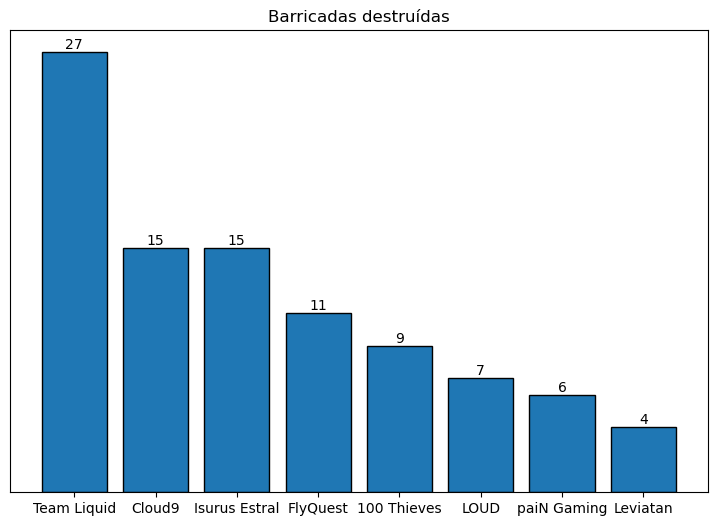

In [ ]:
# Gráfico de barricadas destruídas

plt.figure(figsize=(9, 6))

barras = plt.bar(
    x=turretplates["teamname"],
    height=turretplates["turretplates"],
    edgecolor='k',
    linewidth=1
)

for barra in barras:
    altura = barra.get_height()
    # Colocando rótulo nas barras
    plt.text(barra.get_x()+barra.get_width()/2, altura, f'{altura:.0f}', ha='center', va='bottom')

plt.title("Barricadas destruídas")
plt.yticks([])